<a href="https://colab.research.google.com/github/DanielKorenDataScience/ClassificationProject/blob/main/Classification_Project_Shufersal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project

for Shufersal on-line orders, for replacing of missing products, will predict the replacement success!

In [35]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
p = print
d = display

# Get Data

In [2]:
data_url = 'https://github.com/DanielKorenDataScience/ClassificationProject/blob/main/shufersal_mod.csv?raw=true'
resp = requests.get(data_url)
text = resp.text
p(text[:1000])

with open('Shufersal.csv', 'w') as fh:
    fh.write(text)

,OrderNumbert,HouseHoldID,TransactionDate,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,UnitOfMeasure,ItemsPerPackageWH,DescriptionTavit,Price,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ProductNumberSubs,BrandIndDesc.1,UnitOfMeasureSubs,ItemsPerPackageWHSubs,DescriptionTavit.1,PriceSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSusb,CorrelateItemStatusCode
0,40063,1,2021-02-21,10,6,700,3,-8000500249352,8000500249352,קינדר,0.205,15,205 גרם,18.9,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,,,10,6,700,6,-8000500217740,8000500217740,קינדר,0.086,12,86 גרם,9.9,,,,,,,,,,,1
1,15636,2,2021-03-21,10,6,699,4,2900,178134,פרה,0.4,6,4 * 100 גרם,19.6,514.0,51.0,,5.3,31.0,19.2,0.5,,,12.25,10,6,699,4,23107,7290100852576,פרה,0.3,8,3 * 1


In [3]:
df = pd.read_csv('Shufersal.csv', usecols=range(1,47))  # skip the 0 index col
p(df.shape)
df.columns

(54484, 46)


Index(['OrderNumbert', 'HouseHoldID', 'TransactionDate', 'DepartmentCode',
       'CategoryCode', 'GroupCode', 'SubGroupCode', 'CompoundID',
       'ParentProductNumber', 'BrandIndDesc', 'UnitOfMeasure',
       'ItemsPerPackageWH', 'DescriptionTavit', 'Price', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'DepartmentCodeSubs',
       'CategoryCodeSubs', 'GroupCodeSubs', 'SubGroupCodeSubs',
       'CompoundIDSubs', 'ProductNumberSubs', 'BrandIndDesc.1',
       'UnitOfMeasureSubs', 'ItemsPerPackageWHSubs', 'DescriptionTavit.1',
       'PriceSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs', 'HelbonSubs',
       'ShumanSubs', 'ShumanRavuySubs', 'ShumanTransSubs', 'ColastrolSubs',
       'SivimTzunatimSubs', 'CafiotSucarSusb', 'CorrelateItemStatusCode'],
      dtype='object')

In [4]:
df.head()

,OrderNumbert,HouseHoldID,TransactionDate,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,UnitOfMeasure,ItemsPerPackageWH,DescriptionTavit,Price,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ProductNumberSubs,BrandIndDesc.1,UnitOfMeasureSubs,ItemsPerPackageWHSubs,DescriptionTavit.1,PriceSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSusb,CorrelateItemStatusCode
0,40063,1,2021-02-21,10,6,700,3,-8000500249352,8000500249352,קינדר,0.205,15,205 גרם,18.90,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,NaN,NaN,10,6,700,6,-8000500217740,8000500217740,קינדר,0.086,12,86 גרם,9.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,15636,2,2021-03-21,10,6,699,4,2900,178134,פרה,0.400,6,4 * 100 גרם,19.60,514.0,51.0,NaN,5.3,31.0,19.2,0.5,NaN,NaN,12.25,10,6,699,4,23107,7290100852576,פרה,0.300,8,3 * 100 גרם,10.00,514.0,51.0,NaN,5.3,31.0,19.2,0.5,NaN,NaN,12.25,1
2,40686,3,2021-01-07,10,6,699,3,12043,7610400091060,לינדט,0.100,20,100 גרם,14.90,534.0,51.0,34.0,6.9,32.0,17.0,0.5,10.0,NaN,11.50,10,6,699,3,36777,8690766156404,גודייבה,0.090,10,90 גרם,9.90,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0
3,29327,4,2021-01-28,10,6,699,2,8579,7290112490124,קליק,0.085,12,85 גרם,2.95,527.0,67.4,117.0,7.4,25.3,16.3,0.5,11.0,NaN,12.75,10,6,699,2,8579,7290107649605,קליק,0.085,12,85 גרם,2.95,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,NaN,12.50,1
4,32055,5,2021-02-04,10,6,699,3,30727,7296073382416,שופרסל,0.100,20,100 גרם,8.00,607.0,13.0,10.0,11.0,53.0,32.0,0.5,NaN,17.0,2.00,10,6,699,3,30727,7296073237631,שופרסל,0.100,20,100 גרם,8.00,603.0,23.0,10.0,8.7,50.0,30.0,0.5,NaN,13.0,4.50,1


In [5]:
df.head().T

,0,1,2,3,4
OrderNumbert,40063,15636,40686,29327,32055
HouseHoldID,1,2,3,4,5
TransactionDate,2021-02-21,2021-03-21,2021-01-07,2021-01-28,2021-02-04
DepartmentCode,10,10,10,10,10
CategoryCode,6,6,6,6,6
GroupCode,700,699,699,699,699
SubGroupCode,3,4,3,2,3
CompoundID,-8000500249352,2900,12043,8579,30727
ParentProductNumber,8000500249352,178134,7610400091060,7290112490124,7296073382416
BrandIndDesc,קינדר,פרה,לינדט,קליק,שופרסל


In [6]:
df.columns

Index(['OrderNumbert', 'HouseHoldID', 'TransactionDate', 'DepartmentCode',
       'CategoryCode', 'GroupCode', 'SubGroupCode', 'CompoundID',
       'ParentProductNumber', 'BrandIndDesc', 'UnitOfMeasure',
       'ItemsPerPackageWH', 'DescriptionTavit', 'Price', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'DepartmentCodeSubs',
       'CategoryCodeSubs', 'GroupCodeSubs', 'SubGroupCodeSubs',
       'CompoundIDSubs', 'ProductNumberSubs', 'BrandIndDesc.1',
       'UnitOfMeasureSubs', 'ItemsPerPackageWHSubs', 'DescriptionTavit.1',
       'PriceSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs', 'HelbonSubs',
       'ShumanSubs', 'ShumanRavuySubs', 'ShumanTransSubs', 'ColastrolSubs',
       'SivimTzunatimSubs', 'CafiotSucarSusb', 'CorrelateItemStatusCode'],
      dtype='object')

In [7]:
# fix Typo mistake
df.rename(columns={'OrderNumbert': 'OrderNumber', 'CafiotSucarSusb': 'CafiotSucarSubs', 'ProductNumberSubs': 'ParentProductNumberSubs',
                   'BrandIndDesc.1': 'BrandIndDescSubs', 'DescriptionTavit.1': 'DescriptionTavitSubs'}, inplace=True)
df.columns

Index(['OrderNumber', 'HouseHoldID', 'TransactionDate', 'DepartmentCode',
       'CategoryCode', 'GroupCode', 'SubGroupCode', 'CompoundID',
       'ParentProductNumber', 'BrandIndDesc', 'UnitOfMeasure',
       'ItemsPerPackageWH', 'DescriptionTavit', 'Price', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'DepartmentCodeSubs',
       'CategoryCodeSubs', 'GroupCodeSubs', 'SubGroupCodeSubs',
       'CompoundIDSubs', 'ParentProductNumberSubs', 'BrandIndDescSubs',
       'UnitOfMeasureSubs', 'ItemsPerPackageWHSubs', 'DescriptionTavitSubs',
       'PriceSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs', 'HelbonSubs',
       'ShumanSubs', 'ShumanRavuySubs', 'ShumanTransSubs', 'ColastrolSubs',
       'SivimTzunatimSubs', 'CafiotSucarSubs', 'CorrelateItemStatusCode'],
      dtype='object')

In [8]:
df.fillna(0, inplace=True)

## Calc diff vector

In [9]:
for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', 'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'UnitOfMeasure',
       'ItemsPerPackageWH', 'Price', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar']:
  df[col + 'Diff'] = df[col] - df[col + 'Subs']

df.head().T

,0,1,2,3,4
OrderNumber,40063,15636,40686,29327,32055
HouseHoldID,1,2,3,4,5
TransactionDate,2021-02-21,2021-03-21,2021-01-07,2021-01-28,2021-02-04
DepartmentCode,10,10,10,10,10
CategoryCode,6,6,6,6,6
...,...,...,...,...,...
ShumanRavuyDiff,17.3,0,-1,1.4,2
ShumanTransDiff,0.5,0,0,0,0
ColastrolDiff,15,0,2.5,3,0
SivimTzunatimDiff,0,0,-7.8,0,4


In [10]:
df.to_csv("Shufersal_with_diff.csv", index = False)

In [11]:
df.shape

(54484, 65)

In [12]:
df = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
df.shape

(54484, 65)

In [13]:
df.head()

,OrderNumber,HouseHoldID,TransactionDate,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,UnitOfMeasure,ItemsPerPackageWH,DescriptionTavit,Price,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,UnitOfMeasureSubs,ItemsPerPackageWHSubs,DescriptionTavitSubs,PriceSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,SubGroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,UnitOfMeasureDiff,ItemsPerPackageWHDiff,PriceDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff
0,40063,1,2021-02-21,10,6,700,3,-8000500249352,8000500249352,קינדר,0.205,15,205 גרם,18.90,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,700,6,-8000500217740,8000500217740,קינדר,0.086,12,86 גרם,9.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,0,-3,-31612,31612,0.119,3,9.0,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00
1,15636,2,2021-03-21,10,6,699,4,2900,178134,פרה,0.400,6,4 * 100 גרם,19.60,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,699,4,23107,7290100852576,פרה,0.300,8,3 * 100 גרם,10.00,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1,0,0,0,0,-20207,-7290100674442,0.100,-2,9.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,40686,3,2021-01-07,10,6,699,3,12043,7610400091060,לינדט,0.100,20,100 גרם,14.90,534.0,51.0,34.0,6.9,32.0,17.0,0.5,10.0,0.0,11.50,10,6,699,3,36777,8690766156404,גודייבה,0.090,10,90 גרם,9.90,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0,0,0,0,0,-24734,-1080366065344,0.010,10,5.0,2.0,0.0,13.0,0.4,2.0,-1.0,0.0,2.5,-7.8,-0.50
3,29327,4,2021-01-28,10,6,699,2,8579,7290112490124,קליק,0.085,12,85 גרם,2.95,527.0,67.4,117.0,7.4,25.3,16.3,0.5,11.0,0.0,12.75,10,6,699,2,8579,7290107649605,קליק,0.085,12,85 גרם,2.95,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,0.0,12.50,1,0,0,0,0,0,4840519,0.000,0,0.0,21.0,3.2,-15.0,-0.7,1.2,1.4,0.0,3.0,0.0,0.25
4,32055,5,2021-02-04,10,6,699,3,30727,7296073382416,שופרסל,0.100,20,100 גרם,8.00,607.0,13.0,10.0,11.0,53.0,32.0,0.5,0.0,17.0,2.00,10,6,699,3,30727,7296073237631,שופרסל,0.100,20,100 גרם,8.00,603.0,23.0,10.0,8.7,50.0,30.0,0.5,0.0,13.0,4.50,1,0,0,0,0,0,144785,0.000,0,0.0,4.0,-10.0,0.0,2.3,3.0,2.0,0.0,0.0,4.0,-2.50


## Remove columns that are not numeric - just as a start so can run models

In [14]:
df.drop(['TransactionDate', 'BrandIndDesc', 'DescriptionTavit', 'BrandIndDescSubs', 'DescriptionTavitSubs'], axis=1, inplace=True)

# Models

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
pd.set_option("precision", 2)
def report(clf, X, y, data_type='Test'):
  p()
  p(type(clf).__name__ + ': ' + data_type)
  p('_____________________________________________________')
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  d(cm)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=1, inplace=True)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  d(rep)
  return

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('CorrelateItemStatusCode', axis=1)
y = df.CorrelateItemStatusCode.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [93]:
def showFeatureImportance(model, threshold=0.06):
  fx_imp = pd.Series(model.feature_importances_, index=X_train.columns)
  fx_imp /= fx_imp.max()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fx_imp.plot(kind='barh')

In [95]:
def process_model(model):
  model.fit(X_train, y_train)
  report(model, X_train, y_train, 'Train')
  report(model, X_test, y_test)
  if type(model).__name__ != 'LogisticRegression':  # no features importance data
    #fig = plt.figure(figsize=(10,15))
    showFeatureImportance(model) 

## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

process_model(LogisticRegression())


LogisticRegression: Train
_____________________________________________________


,0,1
0,0,12632
1,0,25506


,precision,recall,f1-score,accuracy,support
0,1.00,0.0,0.0,0.67,12632
1,0.67,1.0,0.8,0.67,25506



LogisticRegression: Test
_____________________________________________________


,0,1
0,0,5442
1,0,10904


,precision,recall,f1-score,accuracy,support
0,1.00,0.0,0.0,0.67,5442
1,0.67,1.0,0.8,0.67,10904


## GradientBoostingClassifier


GradientBoostingClassifier: Train
_____________________________________________________


,0,1
0,8121,4511
1,2304,23202


,precision,recall,f1-score,accuracy,support
0,0.78,0.64,0.70,0.82,12632
1,0.84,0.91,0.87,0.82,25506



GradientBoostingClassifier: Test
_____________________________________________________


,0,1
0,3467,1975
1,1055,9849


,precision,recall,f1-score,accuracy,support
0,0.77,0.64,0.70,0.81,5442
1,0.83,0.90,0.87,0.81,10904


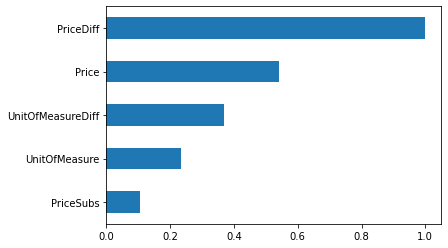

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

process_model(GradientBoostingClassifier(n_estimators=100))